In [1]:
import tensorflow as tf
from tensorflow import keras as K
from tensorflow import keras
tf.__version__

'2.2.0'

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = keras.utils.normalize(x_train, axis=1)
#x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = keras.utils.normalize(x_test, axis=1)
#x_test = x_test / 255.0
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

TypeError: Invalid shape (28, 28, 1) for image data

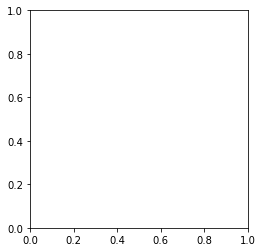

In [3]:
import  matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

In [4]:
model = keras.models.Sequential()
model.add(K.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(K.layers.MaxPool2D((2, 2)))
model.add(K.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(K.layers.MaxPool2D((2, 2)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(128,activation=tf.nn.relu))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.Dense(64, activation=tf.nn.relu))
model.add(K.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

KeyboardInterrupt: 

In [60]:
val_loss = model.evaluate(x_test, y_test)
print(val_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0361 - accuracy: 0.9908

In [61]:
model.save('mnist-cnn-model.model')
model.save('mnist-cnn-model.h5')

INFO:tensorflow:Assets written to: mnist-cnn-model.model\assets


In [62]:
new_model = K.models.load_model("mnist-cnn-model.model")


In [63]:
predictions = new_model.predict(x_test)

In [64]:
predictions

array([[4.9252499e-16, 3.6184614e-11, 1.2062200e-09, ..., 1.0000000e+00,
        3.2423076e-14, 3.4843717e-10],
       [3.5861447e-09, 1.3931992e-06, 9.9999797e-01, ..., 1.6929043e-07,
        2.1537018e-07, 1.6891859e-10],
       [1.0287776e-12, 1.0000000e+00, 5.0854593e-10, ..., 4.2580188e-09,
        5.5057209e-11, 2.5738484e-11],
       ...,
       [1.6602559e-18, 1.6868253e-11, 2.3326169e-11, ..., 6.1483263e-10,
        1.8446721e-10, 3.3003487e-09],
       [4.4223684e-11, 7.1337874e-14, 1.0898064e-12, ..., 2.5379870e-12,
        4.0993456e-08, 7.4458030e-11],
       [2.5929504e-07, 1.9507590e-10, 7.9854935e-11, ..., 2.2151758e-14,
        3.2172474e-07, 5.7491026e-11]], dtype=float32)

In [65]:
import  numpy as np

print(np.argmax(predictions[0]))

7


TypeError: Invalid shape (28, 28, 1) for image data

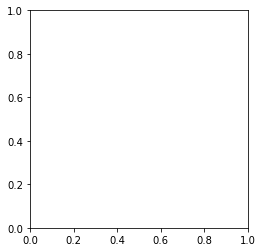

In [56]:
plt.imshow(x_test[0])
plt.show()

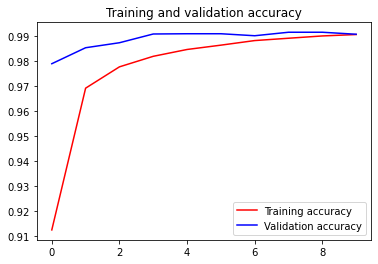

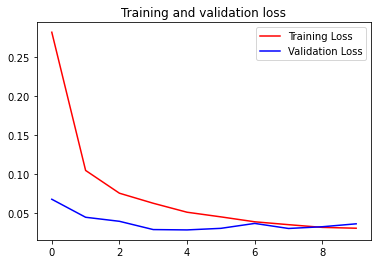

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Training and validation accuracy.png')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Training and validation loss.png')


plt.show()